In [2]:
import os
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from scipy.signal import windows
from scipy.stats import pearsonr

In [3]:
def convolve_w_gaussian(spike_times, time):
    T_samp = np.mean(np.diff(time))

    n = int(0.05 / T_samp)
    alpha = 2.5 # Pulled from comparison with matlab gaussian window
    std = (n-1) / (2*alpha)
    
    convolved = np.convolve(spike_times, windows.gaussian(n, std=std), mode='same')

    return convolved

In [4]:
def load_outputs(pth):
    mat = sio.loadmat(pth)
    spike_probs = mat['spike_prob']
    time = mat['time']

    return spike_probs[0], time

In [5]:
gt_spike_times = np.loadtxt('sample_data/stimtimes_poisson_counts.dat')

In [6]:
[x for x in os.listdir('sample_data/output') if "output" in x and ".mat" in x]

['cRNN_BC_trunc_output.mat',
 'default_output.mat',
 'cRNN_no_dense_trunc_output.mat',
 'cRNN_no_relu_no_smooth_trunc_output.mat',
 'cRNN_sigmoid_trunc_output.mat',
 'cRNN_sigmoid_no_relu_no_smooth_trunc_output.mat',
 'default_trunc_output.mat',
 'cRNN_sigmoid_relu_smooth_trunc_output.mat',
 'cRNN_no_relu_smooth_trunc_output.mat',
 'cRNN_sigmoid_no_relu_smooth_trunc_output.mat',
 'cRNN_relu_smooth_trunc_output.mat',
 'cRNN_sigmoid_relu_no_smooth_trunc_output.mat',
 'cRNN_relu_no_smooth_trunc_output.mat',
 'cRNN_trunc_output.mat',
 'cRNN_sigmoid_BC_trunc_output.mat']

In [7]:
spike_probs_default, time_default = load_outputs('sample_data/output/default_trunc_output.mat')
spike_probs_cRNN, time_cRNN = load_outputs('sample_data/output/cRNN_trunc_output.mat')
spike_probs_cRNN_no_dense, time_cRNN_no_dense = load_outputs('sample_data/output/cRNN_no_dense_trunc_output.mat')
#spike_probs_cRNN_sigmoid, time_cRNN_sigmoid = load_outputs('sample_data/output/cRNN_sigmoid_trunc_output.mat')
#spike_probs_cRNN_BC, time_cRNN_BC = load_outputs('sample_data/output/cRNN_BC_trunc_output.mat')

spike_probs_cRNN_relu_no_smooth, time_cRNN_relu_no_smooth = load_outputs('sample_data/output/cRNN_relu_no_smooth_trunc_output.mat')
spike_probs_cRNN_relu_smooth, time_cRNN_relu_smooth = load_outputs('sample_data/output/cRNN_relu_smooth_trunc_output.mat')
spike_probs_cRNN_no_relu_no_smooth, time_cRNN_no_relu_no_smooth = load_outputs('sample_data/output/cRNN_no_relu_no_smooth_trunc_output.mat')
spike_probs_cRNN_no_relu_smooth, time_cRNN_no_relu_smooth = load_outputs('sample_data/output/cRNN_no_relu_smooth_trunc_output.mat')


In [8]:
convolved_spike_times = convolve_w_gaussian(gt_spike_times, time_default)
convolved_spike_probs_default = convolve_w_gaussian(spike_probs_default, time_default)
convolved_spike_probs_cRNN = convolve_w_gaussian(spike_probs_cRNN, time_cRNN)
convolved_spike_probs_cRNN_no_dense = convolve_w_gaussian(spike_probs_cRNN_no_dense, time_cRNN_no_dense)
#convolved_spike_probs_cRNN_sigmoid = convolve_w_gaussian(spike_probs_cRNN_sigmoid, time_cRNN_sigmoid)
#convolved_spike_probs_cRNN_BC = convolve_w_gaussian(spike_probs_cRNN_BC, time_cRNN_BC)

convolved_spike_probs_relu_no_smooth = convolve_w_gaussian(spike_probs_cRNN_relu_no_smooth, time_cRNN_relu_no_smooth)
convolved_spike_probs_relu_smooth = convolve_w_gaussian(spike_probs_cRNN_relu_smooth, time_cRNN_relu_smooth)
convolved_spike_probs_no_relu_no_smooth = convolve_w_gaussian(spike_probs_cRNN_no_relu_no_smooth, 
                                                              time_cRNN_no_relu_no_smooth)
convolved_spike_probs_no_relu_smooth = convolve_w_gaussian(spike_probs_cRNN_no_relu_smooth, time_cRNN_no_relu_smooth)


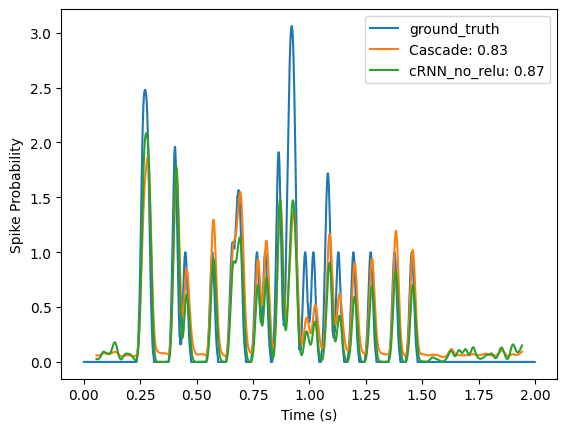

In [9]:
r1 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_default[57:-57])
r2 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_cRNN[57:-57])
r3 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_cRNN_no_dense[57:-57])
#r4 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_cRNN_sigmoid[57:-57])
#r5 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_cRNN_BC[57:-57])
r6 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_relu_no_smooth[57:-57])
r7 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_relu_smooth[57:-57])
r8 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_no_relu_no_smooth[57:-57])
r9 = pearsonr(convolved_spike_times[57:-57], convolved_spike_probs_no_relu_smooth[57:-57])

plt.plot(time_default[0], convolved_spike_times, label = "ground_truth")
plt.plot(time_default[0], convolved_spike_probs_default, label="Cascade: " + f"{r1[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_cRNN, label="cRNN: " + f"{r2[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_cRNN_no_dense, label="cRNN_no_dense: " + f"{r3[0]:.2f}")
#plt.plot(convolved_spike_probs_cRNN_sigmoid, label="cRNN_sigmoid: " + f"{r4[0]:.2f}")
#plt.plot(convolved_spike_probs_cRNN_BC, label="cRNN_BC: " + f"{r5[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_relu_no_smooth, label="cRNN_relu_no_smooth: " + f"{r6[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_relu_smooth, label="cRNN_relu_smooth: " + f"{r7[0]:.2f}")
#plt.plot(time_default[0], convolved_spike_probs_no_relu_no_smooth, label="cRNN_no_relu_no_smooth: " + f"{r8[0]:.2f}")
plt.plot(time_default[0], convolved_spike_probs_no_relu_smooth, label="cRNN_no_relu: " + f"{r9[0]:.2f}")


plt.legend()
plt.ylabel("Spike Probability")
plt.xlabel("Time (s)")
plt.savefig("cascade_changes_fig.png")
plt.title("Pearson's Correlation across ")


In [10]:
time_default[0]

array([0.0000000e+00, 9.8020000e-04, 1.9604000e-03, ..., 1.9966674e+00,
       1.9976476e+00, 1.9986278e+00])

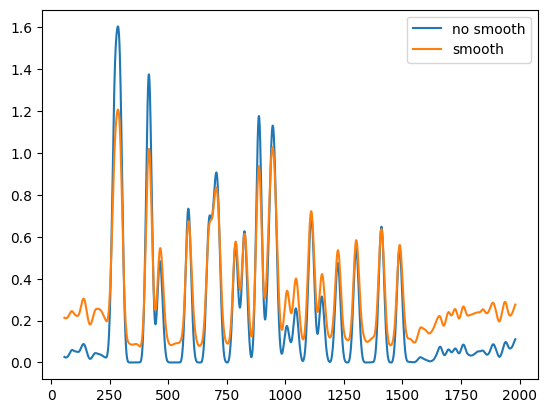

In [11]:
plt.plot(convolved_spike_probs_relu_no_smooth, label = "no smooth")
plt.plot(convolved_spike_probs_relu_smooth, label="smooth")
plt.legend()

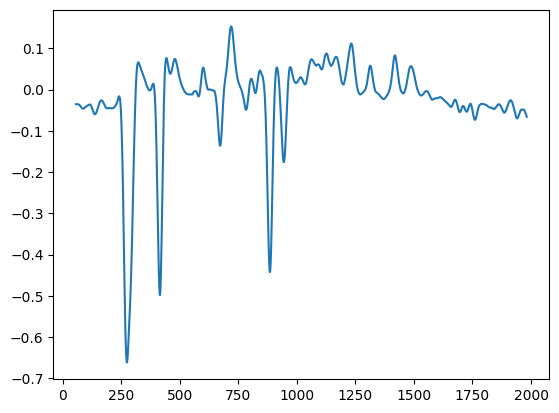

: 

In [12]:
plt.plot(convolved_spike_probs_default- convolved_spike_probs_cRNN)